In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [ ]:
import matplotlib.image as mpimg
 
# Read Images
img = mpimg.imread('data/ExpW/images/angry_actor_104.jpg')
 
# Output Images
plt.imshow(img)

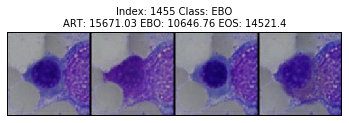

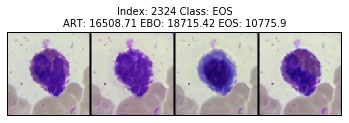

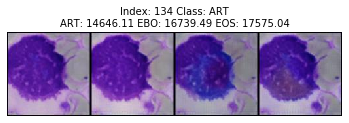

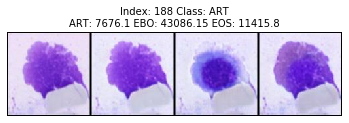

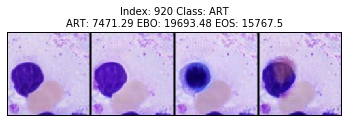

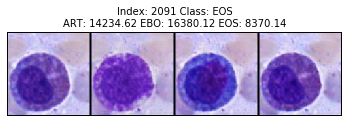

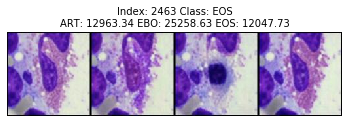

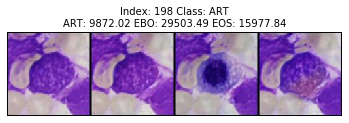

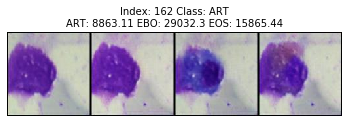

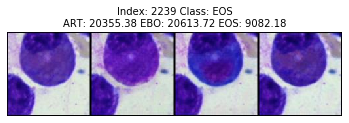

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Read the data from the CSV file
csv_file = "/home/mikylab/stargan-identity/stargan_identity.cyto0/results/testDistances60.csv"

data = pd.read_csv(csv_file)

# Step 2: Randomly select an index
import random
num_rows = 10
for _ in range(num_rows):
    random_index = random.randint(0, len(data) - 1)

    # Step 3: Get the values for the chart
    correct_val = data.iloc[random_index, 0]
    value1_val = round(data.iloc[random_index, 1], 2)  # Round value1 to 2 decimal places
    value2_val = round(data.iloc[random_index, 2], 2)  # Round value2 to 2 decimal places
    value3_val = round(data.iloc[random_index, 3], 2)  # Round value3 to 2 decimal places

    if correct_val == 0:
        correct_val = 'ART'
    elif correct_val == 1:
        correct_val = 'EBO'
    else:
        correct_val = 'EOS'

    # Step 4: Create and display the chart
    classes = ['class1', 'class2', 'class3']
    values = [value1_val, value2_val, value3_val]



    # Step 5: Display the image based on the selected index
    #image_path = data.iloc[random_index, 4]  # Assuming the image path is in the 5th column (adjust the index if different)
    image_path = '/home/mikylab/stargan-identity/stargan_identity.cyto0/results/retest-{}-images.jpg'.format(random_index)
    image = Image.open(image_path)
    plt.imshow(image)

    class_text = f'Index: {random_index} Class: {correct_val}\nART: {value1_val} EBO: {value2_val} EOS: {value3_val}'
    plt.text(0.5, 1.05, class_text, ha='center', va='bottom', transform=plt.gca().transAxes)
    plt.axis('off')  # Hide axis ticks and labels
    plt.show()


In [2]:
''' Read in The Distances for the Training and Test sets'''
csv_train = "trainDistance720.csv"
csv_test = "testDistance720.csv"

trainDistances = pd.read_csv(csv_train)
trainArray = np.asarray(trainDistances)

testDistances = pd.read_csv(csv_test)
testArray = np.asarray(testDistances)

Y_train = trainArray[:, 0]
Y = testArray[:, 0]

In [112]:
csv_train = "/home/mikylab/stargan-identity/stargan_identity.bel0/results/trainDistances_bel60.csv"

trainDistances = pd.read_csv(csv_train)
trainArray = np.asarray(trainDistances)

Y_train = trainArray[:, 0]
predicted_train = np.load("/home/mikylab/stargan-identity/stargan_identity.bel0/results/predicted_beltrain60_poly.npy")


''' Calculate Correct Test Predictions'''
class_predictions_test = np.argmax(predicted_train, axis=1)

correct_test = np.sum(Y_train == class_predictions_test)

correct_test/class_predictions_test.shape[0]


0.7193146209747316

In [73]:
0.8285912560721721

0.8285912560721721

In [85]:
predicted_train.shape

(2882, 3)

In [54]:
(Y_train == class_predictions_test)[]

True

In [3]:
''' Load the Polynomial predictions '''
predicted_train = np.load("predicted_train_poly.npy")

predicted_test = np.load("predicted_test_poly.npy")

In [31]:
''' Calculate Correct Test Predictions'''
class_predictions_test = np.argmax(predicted_test, axis=1)

correct_test = np.sum(Y == class_predictions_test)

correct_test/class_predictions_test.shape[0]

0.645933014354067

In [5]:
testArray.shape

(209, 8)

In [ ]:
angry_images = trainArray[trainArray[:,0]== 0]
disgust_images = trainArray[trainArray[:,0]== 1]
fear_images = trainArray[trainArray[:,0]== 2]
happy_images = trainArray[trainArray[:,0]== 3]
neutral_images = trainArray[trainArray[:,0]== 4]
sad_images = trainArray[trainArray[:,0]== 5]
surprise_images = trainArray[trainArray[:,0]== 6]

In [27]:
''' Calculate Correct Train Predictions'''

class_predictions_train = np.argmax(predicted_train, axis=1)

correct = np.sum(Y_train == class_predictions_train)

correct/class_predictions_train.shape[0]

0.3584528176058686

In [ ]:
# angry  disgust  fear  happy  neutral  sad  surprise

In [ ]:
angry_images[0]

In [ ]:
''' Scatter Plots in 2d'''
plt.scatter(angry_images[:, 1], angry_images[:, 2], alpha = .05, label = "Angry")
plt.scatter(disgust_images[:, 1], disgust_images[:, 2], alpha = .1, label = "Disgust")

plt.xlabel("Angry Expression")
plt.ylabel("Disgust Expression")
plt.legend()

In [ ]:
''' Scatter Plots in 2d'''
plt.scatter(angry_images[:, 1], angry_images[:, 2], alpha = .05, label = "Disgust")
plt.scatter(disgust_images[:, 1], disgust_images[:, 2], alpha = .1, label = "Fear")
#plt.scatter(angry_images[:, 1], angry_images[:, 4], alpha = .05, label = "Happy")
#plt.scatter(angry_images[:, 1], angry_images[:, 5], alpha = .05, label = "Neutral")
#plt.scatter(angry_images[:, 1], angry_images[:, 6], alpha = .05, label = "Sad")
#plt.scatter(angry_images[:, 1], angry_images[:, 7], alpha = .05, label = "Surprise")


#Benign Images -> Benign & Maligant
#Maligant Images -> Benign & Malignant

plt.xlabel("Distance to Angry")
plt.ylabel("Distance to Other Expression")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Load the data from the CSV file as a NumPy array
arr = np.genfromtxt("testDistances.csv", delimiter=",")

# Set the labels for the different emotions
labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

# Loop over the columns of the array
for i in range(1, arr.shape[1]):
    # Get the x and y values for the plot
    x = arr[:, 0]
    y = arr[:, i]

    # Plot the column against the first column
    plt.scatter(x, y, label=labels[i-1])

# Add a legend to the plot
plt.legend()

# Set the x-axis labels to the labels for the emotions
plt.xticks(np.arange(7), labels)

# Show the plot
plt.show()


In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10), sharex = True, sharey = True)
ax1.scatter(angry_images[:, 1], angry_images[:, 2], alpha = .05, label = "Angry", c = 'darkgray')
ax1.scatter(disgust_images[:, 1], disgust_images[:, 2], alpha = .1, label = "Disgust", c = 'green')
ax1.set_xlabel("Angry Expression")
ax1.set_ylabel("Disgust Expression")

ax2.scatter(angry_images[:, 1], angry_images[:, 3], alpha = .05, label = "Angry", c = 'darkgrey')
ax2.scatter(fear_images[:, 1], fear_images[:, 3], alpha = .01, label = "Fear", c = 'purple')
ax2.set_xlabel("Angry Expression")
ax2.set_ylabel("Fear Expression")


ax3.scatter(angry_images[:, 1], angry_images[:, 4], alpha = .05, label = "Angry", c = 'darkgrey')
ax3.scatter(happy_images[:, 1], happy_images[:, 4], alpha = .01, label = "Happy", c = 'orange')
ax3.set_xlabel("Angry Expression")
ax3.set_ylabel("Happy Expression")


ax4.scatter(angry_images[:, 1], angry_images[:, 5], alpha = .05, label = "Angry", c = 'darkgrey')
ax4.scatter(neutral_images[:, 1], neutral_images[:, 5], alpha = .01, label = "Neutral", c = 'brown')
ax4.set_xlabel("Angry Expression")
ax4.set_ylabel("Neutral Expression")

ax5.scatter(angry_images[:, 1], angry_images[:, 6], alpha = .05, label = "Angry", c = 'darkgrey')
ax5.scatter(sad_images[:, 1], sad_images[:, 6], alpha = .01, label = "Sad", c = 'blue')
ax5.set_xlabel("Angry Expression")
ax5.set_ylabel("Sad Expression")

ax6.scatter(angry_images[:, 1], angry_images[:, 7], alpha = .05, label = "Angry", c = 'darkgrey')
ax6.scatter(surprise_images[:, 1], surprise_images[:, 6], alpha = .01, label = "Sad", c = 'fuchsia')
ax6.set_xlabel("Angry Expression")
ax6.set_ylabel("Surprise Expression")

fig.tight_layout()

In [ ]:
# Plot a hexbin plot of the data. Use for larger image samples. 

x1 = angry_images[:, 1]
y1 = angry_images[:, 2]

x2 = happy_images[:, 1]
y2 = happy_images[:, 2]

# Define hexbin grid extent
xmin = min(*x1, *x2)
xmax = max(*x1, *x2)
ymin = min(*y1, *y2)
ymax = max(*y1, *y2)
ext = (xmin, xmax, ymin, ymax)

# Draw figure with colorbars
plt.figure(figsize=(10, 6))
hist1 = plt.hexbin(x1, y1, gridsize=30, cmap='Blues', mincnt=1, alpha=0.2, extent=ext)
hist2 = plt.hexbin(x2, y2, gridsize=30, cmap='Reds', mincnt=1, alpha=.1, extent=ext)



clb2 = plt.colorbar(hist2, orientation='vertical')
clb1 = plt.colorbar(hist1, orientation='vertical')

# Set titles 
clb1.ax.set_title('Benign Test Images',fontsize=10)
clb2.ax.set_title('Malignant Test Images',fontsize=10)
plt.title("L1 Distances")
plt.xlabel("L1 Distance to Benign")
plt.ylabel("L1 Distance to Malignant")

plt.show()

In [ ]:
def comparison_plots(comparison_images, i, label, alpha1 = .05):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10), sharex = True, sharey = True)
    ax1.scatter(comparison_images[:, i], comparison_images[:, 1], alpha = alpha1, label = label, c = 'darkgray')
    ax1.scatter(angry_images[:, i], angry_images[:, 1], alpha = .01, label = "Angry", c = 'green')
    ax1.set_xlabel(label + " Expression")
    ax1.set_ylabel("Angry Expression")
    
    ax2.scatter(comparison_images[:, i], comparison_images[:, 2], alpha = alpha1, label = label, c = 'darkgrey')
    ax2.scatter(disgust_images[:, i], disgust_images[:, 2], alpha = .1, label = "Disgust", c = 'teal')
    ax2.set_xlabel(label + " Expression")
    ax2.set_ylabel("Disgust Expression")

    ax3.scatter(comparison_images[:, i], comparison_images[:, 3], alpha = alpha1, label = label, c = 'darkgrey')
    ax3.scatter(fear_images[:, i], fear_images[:, 3], alpha = .01, label = "Fear", c = 'purple')
    ax3.set_xlabel(label+ " Expression")
    ax3.set_ylabel("Fear Expression")


    ax4.scatter(comparison_images[:, i], comparison_images[:, 4], alpha = alpha1, label = label, c = 'darkgrey')
    ax4.scatter(happy_images[:, i], happy_images[:, 4], alpha = .01, label = "Happy", c = 'orange')
    ax4.set_xlabel(label +" Expression")
    ax4.set_ylabel("Happy Expression")


    ax5.scatter(comparison_images[:, i], comparison_images[:, 5], alpha = alpha1, label = label, c = 'darkgrey')
    ax5.scatter(neutral_images[:, i], neutral_images[:, 5], alpha = .01, label = "Neutral", c = 'brown')
    ax5.set_xlabel(label + " Expression")
    ax5.set_ylabel("Neutral Expression")

    ax6.scatter(comparison_images[:, i], comparison_images[:, 6], alpha = alpha1, label = label, c = 'darkgrey')
    ax6.scatter(sad_images[:, i], sad_images[:, 6], alpha = .01, label = "Sad", c = 'blue')
    ax6.set_xlabel(label + " Expression")
    ax6.set_ylabel("Sad Expression")

    ax7.scatter(comparison_images[:, i], comparison_images[:, 7], alpha = alpha1, label = label, c = 'darkgrey')
    ax7.scatter(surprise_images[:, i], surprise_images[:, 7], alpha = .01, label = "Sad", c = 'fuchsia')
    ax7.set_xlabel(label + " Expression")
    ax7.set_ylabel("Surprise Expression")

    fig.tight_layout()
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    ax5.legend()
    ax6.legend()
    ax7.legend()

In [ ]:
comparison_plots(disgust_images, 1, "Angry")

In [ ]:
#plt.scatter(np.arange(0,7), predicted_train[0], label = '1')
plt.title("Image 3 probabilities for each class")
#plt.scatter(np.arange(0,7), predicted_train[1], label = '2')
plt.scatter(np.arange(0,7), predicted_train[2], label = '3')
# plt.scatter(np.arange(0,7), predicted_train[3], label = '4')
# plt.scatter(np.arange(0,7), predicted_train[4], label = '5')
# plt.scatter(np.arange(0,7), predicted_train[5], label = '6')
# plt.scatter(np.arange(0,7), predicted_train[6], label = '7')
# plt.scatter(np.arange(0,7), predicted_train[7], label = '8')
# plt.scatter(np.arange(0,7), predicted_train[8], label = '9')
plt.legend()

# plt.plot(np.arange(0,7), predicted_train[0], label = '1')
# plt.plot(np.arange(0,7), predicted_train[1], label = '2')
# plt.plot(np.arange(0,7), predicted_train[2], label = '3')
# plt.plot(np.arange(0,7), predicted_train[3], label = '4')
# plt.plot(np.arange(0,7), predicted_train[4], label = '5')
# plt.plot(np.arange(0,7), predicted_train[5], label = '6')
# plt.plot(np.arange(0,7), predicted_train[6], label = '7')
# plt.plot(np.arange(0,7), predicted_train[7], label = '8')
# plt.plot(np.arange(0,7), predicted_train[8], label = '9')
# plt.legend()

In [ ]:
plt.scatter(np.arange(0,7), predicted_train[9])
plt.scatter(np.arange(0,7), predicted_train[10])
plt.scatter(np.arange(0,7), predicted_train[11])
plt.scatter(np.arange(0,7), predicted_train[12])
plt.scatter(np.arange(0,7), predicted_train[13])
plt.scatter(np.arange(0,7), predicted_train[14])
plt.scatter(np.arange(0,7), predicted_train[15])
plt.scatter(np.arange(0,7), predicted_train[16])

In [ ]:
Y_train[0]